Loading data, please wait...
System ready


In [278]:
AIRBNB_DT.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [279]:
AIRBNB_DT.state.head()

0    CA
1    CA
2    CA
3    CA
4    CA
Name: state, dtype: object

In [364]:
class Airbnb:
    def __init__(self, city):
        self.city = city
        
    #Internal: It can be call by other method only.
    def _line_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        line_plot_xlabel = axis_x
        line_plot_ylabel = axis_y
        
        fig, line_plot_name = plt.subplots(figsize=(8,5))
        fig.suptitle(title, fontsize='14')
        
        line_plot_name.plot(line_plot_xlabel, line_plot_ylabel)
        
        line_plot_name.grid()
        line_plot_name.set_xlabel(label_x)
        line_plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                line_plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                line_plot_name.set_ylim(zoom_y)
        except:
            pass

        return plt.show()
    
    #Internal: It can be call by other method only.
    def _scatter_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        fig, plot_name = plt.subplots(figsize=(8,5))
        fig.suptitle(title, fontsize='14')

        plot_name.scatter(axis_x, axis_y, color='g', marker='o', edgecolors='r')

        plot_name.grid()
        plot_name.set_xlabel(label_x)
        plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                plot_name.set_ylim(zoom_y)
        except:
            pass
        plot_name.legend(loc='best')
        return plt.show()
    
    #Internal: It can be call by other method only.
    def _bar_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        #df_pivot.columns = ['Bedrooms', 'Room Type', 'Number of rooms']
        bar_xlabel = axis_x
        bar_ylabel = axis_y
        #print(df_pivot.sum())
        
        fig, bar_plot_name = plt.subplots(figsize=(8,5))
        fig.suptitle(title, fontsize='14')
        
        bar_plot_name.bar(bar_xlabel, bar_ylabel, align='center', alpha=0.5)
        
        bar_plot_name.grid()
        bar_plot_name.set_xlabel(label_x)
        bar_plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                bar_plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                bar_plot_name.set_ylim(zoom_y)
        except:
            pass

        return plt.show()
    
    #Internal: Determine whether a zoom value is valid or not
    def _is_zoom(self, zoom_val):
        if zoom_val[0] > 0 or zoom_val[1] > 0:
            return zoom_val
        else:
            return False
        
    #Internal: Special function to format any row of any dataframe. Two types_format, money or float
    def put_format_rows(df, row, type_format):
        if type_format == 'money':
            type_format = '${:,.2f}'
        elif type_format == 'float':
            type_format = '{:,.2f}'
    
        df[row] = df[row].map(type_format.format)
        return df[row]
    

    #Parameters:
    # *x_zoom (list): Zoom into x axis. Most have 2 values: [10,10]
    # *y_zoom (list): Zoom into y axis. Most have 2 values: [25,55]
    def supply_month(self, x_zoom, y_zoom):
        print(f"*Average Advertising per month: {AIRBNB_DT[AIRBNB_DT.state==self.city].id.count()}") 
        return self._scatter_plot(AIRBNB_DT['review_scores_rating'],
                 AIRBNB_DT[AIRBNB_DT.columns[62]].replace('[\$,]', '', regex=True).astype(float),
                 'Reviews vs Monthly Price', 'Reviews', 'Monthly Price', self._is_zoom(x_zoom), self._is_zoom(y_zoom) 
                )
    #Calculate daily rate. Use 'price' column to do the math
    def daily_rate(self):
        #Average daily rate per month
        self.daily_rate = AIRBNB_DT[AIRBNB_DT.columns[60]].replace('[\$,]', '', regex=True).astype(float).mean()
        print(f"Average daily rate per month: {str(self.daily_rate)}")
    
    #Calculate Availibility rate by periods.
    #Parameters:
    # *days (int): 30, 60, 90 or 365 days only. Other value will be rejected.
    def aval_rate(self, days):
        if days == 30 or days == 60 or days == 90 or days == 365:
            days_range = 'availability_' + str(days)
            return (AIRBNB_DT[days_range]/365*100).mean()
        else:
            return "aval_rate accepts 30, 60, 90 or 365 days"
    
    #Calculate Total Revenue rate by day, week, or month.
    #Parameters:
    # *period (str): (d)aily, (w)eekly and (m)onthly only. Other value will be rejected.
    def total_revenue(self, period):
        if period == 'd':
            price_column = 'price'
        elif period == 'w':
            price_column = 'weekly_price'
        elif period == 'm':
            price_column = 'monthly_price'
        else:
            return 'Unknown period. total_revenue accepts (d)aily, (w)eekly and (m)onthly parameters only'
        
        return (AIRBNB_DT[price_column]).replace('[\$,]', '', regex=True).astype(float).sum()
    
    #Create DF of Room types and count each type.
    def room_type(self,):
        #Los Angeles room by category (CHECK IF THERE MANY YEARS OF DATA)
        room_type_df = AIRBNB_DT.groupby(["room_type"])["id"].count().reset_index()
        room_type_df.columns = ['Room Type', 'Quantity']
        return room_type_df
        #Los Angeles room category by percentage last month
        #Grafica apilada por mes
    
    def bedrooms(self, x_zoom, y_zoom):
        count_bedrooms = AIRBNB_DT.groupby(['bedrooms','room_type']).id.count().reset_index()
        count_bedrooms_pivot = count_bedrooms.pivot(index = 'bedrooms', columns='room_type', values='id').reset_index()
        print(count_bedrooms_pivot.fillna(0))
        return self._bar_plot(count_bedrooms['bedrooms'],
                              count_bedrooms['id'],
                              'Bedrooms per propertie',
                              'Bedrooms',
                              'Properties',
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom)
                             )
    def score_rating(self, x_zoom, y_zoom):
        return AIRBNB_DT['review_scores_rating'].mean()
    
    def review_type_room(self, x_zoom, y_zoom):
        rtr_dr = AIRBNB_DT.groupby('room_type').review_scores_rating.mean().reset_index()
        print(rtr_dr)
        return self._bar_plot(rtr_dr['room_type'], 
                               rtr_dr['review_scores_rating'], 
                               'Avg Reviews per room type', 'Room Type', 'Avg. Reviews', self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))

In [365]:
city = Airbnb('CA')

         room_type  review_scores_rating
0  Entire home/apt             94.642219
1     Private room             94.625798
2      Shared room             90.082372


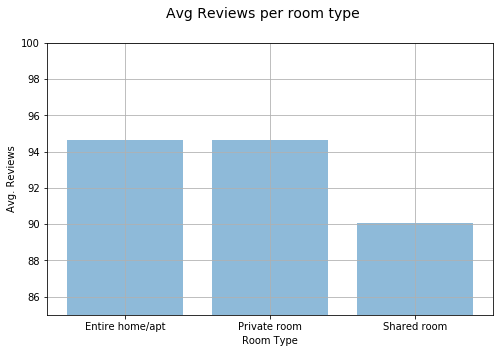

In [362]:
city.review_type_room([0,0],[85,100])

*Average Advertising per month: 43894


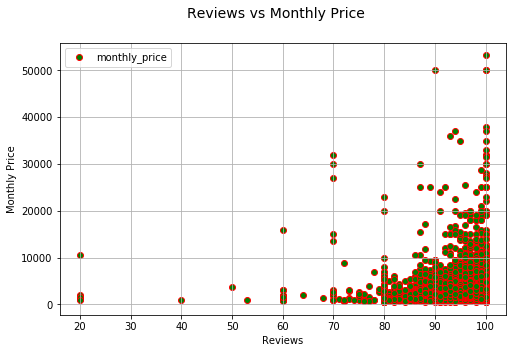

In [347]:
city.supply_month([0,0],[0,0])

In [348]:
city.daily_rate()

Average daily rate per month: 199.5699595031169


In [349]:
city.aval_rate(365)

43.92808546419171

In [350]:
city.total_revenue('m')

16997600.0

In [351]:
city.room_type()

,Room Type,Quantity
0,Entire home/apt,27612
1,Private room,14563
2,Shared room,1779


room_type  bedrooms  Entire home/apt  Private room  Shared room
0               0.0           4258.0         493.0          1.0
1               1.0          10514.0       13381.0       1778.0
2               2.0           7268.0         540.0          0.0
3               3.0           3252.0          98.0          0.0
4               4.0           1383.0          31.0          0.0
5               5.0            599.0          11.0          0.0
6               6.0            182.0           1.0          0.0
7               7.0             93.0           1.0          0.0
8               8.0             20.0           1.0          0.0
9               9.0             13.0           1.0          0.0
10             10.0              7.0           0.0          0.0
11             11.0              4.0           1.0          0.0
12             12.0              0.0           1.0          0.0


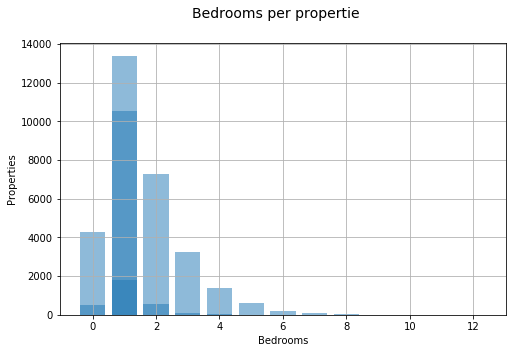

In [352]:
city.bedrooms([0,0],[0,0])

In [298]:
city.score_rating([0,0],[0,0])

94.47813486370158

In [68]:
la_df.shape

NameError: name 'la_df' is not defined

In [8]:
#Average daily rate
# Parameters: (d)aily, (w)eekly, (m)onthly
avg_price('w')

1032.0467144795502

In [10]:
la_df.columns.get_loc("reviews_per_month")

105

In [84]:
la_df['review_scores_rating'].max()

100.0

In [85]:
la_df['review_scores_rating'].min()

20.0

In [86]:
la_df['review_scores_rating'].median()

97.0

In [87]:
la_df['review_scores_rating'].mean()

94.47813486370158

In [12]:
#Bedrooms vs 

def airbnb_plot(plot_name, axis_x, axis_y, title, labelx, labely):
    fig, plot_name = plt.subplots(figsize=(8,5))
    fig.suptitle(title, fontsize='14')
    
    axis_xs = axis_x
    axis_xs_mean = axis_xs.mean()
    axis_ys = axis_y

    plot_name.scatter(axis_xs, axis_ys, color='g', marker='o', edgecolors='r')
    #plot_name.scatter(scatter_x, scatter_y_reviews, color='b', marker='o', edgecolors='r')
    plot_name.grid()
    plot_name.set_xlabel(labelx)
    plot_name.set_ylabel(labely)
    #plot_name.set_xlim([60,105])
    plot_name.legend(loc='best')
    return plt.show()

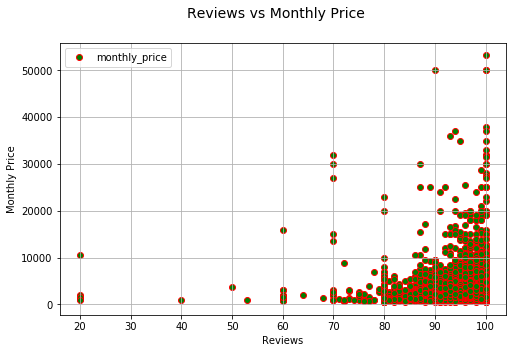

In [13]:
airbnb_plot('plt_1',
            la_df['review_scores_rating'],
            la_df[la_df.columns[62]].replace('[\$,]', '', regex=True).astype(float), 
            'Reviews vs Monthly Price', 'Reviews', 'Monthly Price')

In [26]:
numeric_df = la_df.select_dtypes(include=['int','float'])

In [28]:
numeric_df.dtypes

id                                                int64
scrape_id                                         int64
thumbnail_url                                   float64
medium_url                                      float64
xl_picture_url                                  float64
host_id                                           int64
host_acceptance_rate                            float64
host_listings_count                             float64
host_total_listings_count                       float64
neighbourhood_group_cleansed                    float64
latitude                                        float64
longitude                                       float64
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
square_feet                                     float64
guests_included                                 

In [56]:
la_df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [58]:
entire_home_apt_df = la_df[la_df["room_type"] == 'Entire home/apt']

In [82]:
entire_home_apt_df.head()
bad_reviews = entire_home_apt_df[entire_home_apt_df['review_scores_rating']<= 93]
good_reviews = entire_home_apt_df[entire_home_apt_df['review_scores_rating']> 93]

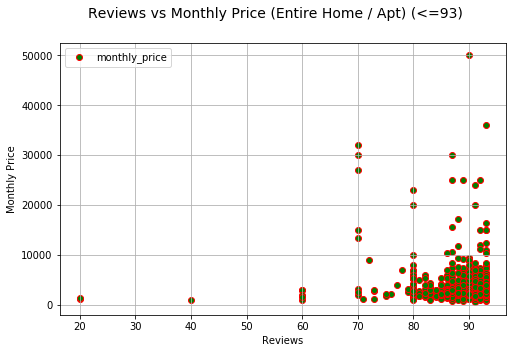

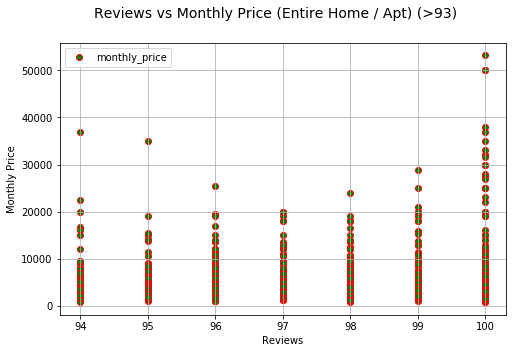

In [83]:
airbnb_plot('plt__entire_home_bad',
            bad_reviews['review_scores_rating'],
            bad_reviews[la_df.columns[62]].replace('[\$,]', '', regex=True).astype(float), 
            'Reviews vs Monthly Price (Entire Home / Apt) (<=93)', 'Reviews', 'Monthly Price')

airbnb_plot('plt__entire_home_good',
            good_reviews['review_scores_rating'],
            good_reviews[la_df.columns[62]].replace('[\$,]', '', regex=True).astype(float), 
            'Reviews vs Monthly Price (Entire Home / Apt) (>93)', 'Reviews', 'Monthly Price')

In [ ]:
entire_home_apt_mean = entire_home_apt_df['review_scores_rating'].dropna()

In [ ]:
entire_home_apt_mean

In [62]:
q1 = np.percentile(entire_home_apt_mean, 25)

In [63]:
q1

93.0

In [64]:
q3 = np.percentile(entire_home_apt_mean, 75)

In [65]:
q3

100.0

In [66]:
entire_home_apt_mean.max()

100.0